Installing libraries to be used in Data Analysis

In [1]:
#!pip install folium
import folium
from folium import plugins
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime
import seaborn as sns


Below we will Reading the Food Inspection CSV file and viewing first few columns

In [3]:
Food_Inspection=pd.read_csv("foodinspection.csv")
Food_Inspection.head()

Inspection ID                          DBA Name                  AKA Name  \
0        2312631           YATES ELEMENTARY SCHOOL   YATES ELEMENTARY SCHOOL   
1        2312624                           FRESHII                   FRESHII   
2        2312637  BUFFET LOS AMIGOS RESTAURANT INC  ANTOJITOS GUATEMALATECOS   
3        2312645           GORDITAS AGUASCALIENTES   GORDITAS AGUASCALIENTES   
4        2312636          EL SUPERMERCADO MARTINEZ     SUPERMERCADO MARTINEZ   

   License #  Facility Type             Risk                Address     City  \
0    25911.0         School    Risk 1 (High)       1839 N Richmond   CHICAGO   
1  2690035.0     Restaurant    Risk 1 (High)    111 W JACKSON BLVD   CHICAGO   
2  2583903.0     Restaurant    Risk 1 (High)  5823 W FULLERTON AVE   CHICAGO   
3  2487821.0     Restaurant    Risk 1 (High)     5249 S KEDZIE AVE   CHICAGO   
4  2363817.0  Grocery Store  Risk 2 (Medium)     4301 S ARCHER AVE   CHICAGO   

  State      Zip  ...             Results  \
0    IL  60647.0  ...                Fail   
1    IL  60604.0  ...                Pass   
2    IL  60639.0  ...     Out of Business   
3    IL  60632.0  ...  Pass w/ Conditions   
4    IL  60632.0  ...     Out of Business   

                                          Violations   Latitude  Longitude  \
0  10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...  41.915029 -87.700243   
1  55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...  41.878034 -87.631171   
2                                                NaN  41.923778 -87.771914   
3  23. PROPER DATE MARKING AND DISPOSITION - Comm...  41.797544 -87.703523   
4                                                NaN  41.815301 -87.702042   

                                   Location  Historical Wards 2003-2015  \
0  (-87.70024324273244, 41.915028583238914)                         NaN   
1   (-87.63117140697915, 41.87803442833617)                         NaN   
2  (-87.77191442640833, 41.923777505298624)                         NaN   
3  (-87.70352333204033, 41.797543905371754)                         NaN   
4   (-87.70204160078063, 41.81530069366088)                         NaN   

  Zip Codes  Community Areas  Census Tracts  Wards  
0       NaN              NaN            NaN    NaN  
1       NaN              NaN            NaN    NaN  
2       NaN              NaN            NaN    NaN  
3       NaN              NaN            NaN    NaN  
4       NaN              NaN            NaN    NaN  

[5 rows x 22 columns]

Below is the statement for Checking the number of rows in dataset.

In [4]:
len(Food_Inspection)

193376

Data Cleaning:

First let us drop few columns which are not useful for our analysis.
Aka Name which is similar to that of DBA Name can be removed. City and State is same for all the rows so we can drop these too. Other column names Historical Wards 2003-2015, Zip Codes, Community Areas, Census Tracts, and Wards have no values given so we can drop these columns.

In [5]:
Food_Inspection.drop(['AKA Name','City',"State","Historical Wards 2003-2015","Zip Codes","Community Areas","Census Tracts","Wards"] , axis=1 , inplace=True)
Food_Inspection.head()

Inspection ID                          DBA Name  License #  Facility Type  \
0        2312631           YATES ELEMENTARY SCHOOL    25911.0         School   
1        2312624                           FRESHII  2690035.0     Restaurant   
2        2312637  BUFFET LOS AMIGOS RESTAURANT INC  2583903.0     Restaurant   
3        2312645           GORDITAS AGUASCALIENTES  2487821.0     Restaurant   
4        2312636          EL SUPERMERCADO MARTINEZ  2363817.0  Grocery Store   

              Risk                Address      Zip Inspection Date  \
0    Risk 1 (High)       1839 N Richmond   60647.0       9/20/2019   
1    Risk 1 (High)    111 W JACKSON BLVD   60604.0       9/20/2019   
2    Risk 1 (High)  5823 W FULLERTON AVE   60639.0       9/20/2019   
3    Risk 1 (High)     5249 S KEDZIE AVE   60632.0       9/20/2019   
4  Risk 2 (Medium)     4301 S ARCHER AVE   60632.0       9/20/2019   

         Inspection Type             Results  \
0  Canvass Re-Inspection                Fail   
1  License Re-Inspection                Pass   
2                Canvass     Out of Business   
3                Canvass  Pass w/ Conditions   
4                Canvass     Out of Business   

                                          Violations   Latitude  Longitude  \
0  10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...  41.915029 -87.700243   
1  55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...  41.878034 -87.631171   
2                                                NaN  41.923778 -87.771914   
3  23. PROPER DATE MARKING AND DISPOSITION - Comm...  41.797544 -87.703523   
4                                                NaN  41.815301 -87.702042   

                                   Location  
0  (-87.70024324273244, 41.915028583238914)  
1   (-87.63117140697915, 41.87803442833617)  
2  (-87.77191442640833, 41.923777505298624)  
3  (-87.70352333204033, 41.797543905371754)  
4   (-87.70204160078063, 41.81530069366088)

Below is the syntax for Checking any null values in data set.

In [6]:
Food_Inspection.isnull().values.any()

True

As there are null values in our data we can drop those rows. we can see some values in the data set are blank ie, no value is given, for them. 
In below statement first we will change empty cells to null so that all null values can be removed at once.
Not always droping null values is efficent as we are dealing with large data set dropping few rows may not impact the Analysis.

In [7]:
Food_Inspection.replace('', np.nan, inplace=True)
Food_Inspection.dropna(inplace=True)
len(Food_Inspection)

141450

We can see from len command that lots of rows containing null values were removed.

In further data cleaning we check the values for each columns which brings no meaning for our analyis.
Column 'Results' contains some values as Out of Business, Not ready, No Entry and Business Not Located which brings no meaning to our analyis. As we are doing Food Inspection Analysis considering places who are Out of Business makes no sense. So we can remove the rows with such values.
After droping the unneccesary values checking for number of rows.

In [8]:
Food_Inspection = Food_Inspection[(Food_Inspection.Results != 'Out of Business') &(Food_Inspection.Results !='Not Ready') &(Food_Inspection.Results !='No Entry')& (Food_Inspection.Results !='Business Not Located')]
len(Food_Inspection)

140944

Using head command lets view first 25 rows to check few rows we cleaned below.

In [9]:
Food_Inspection.head(25)

Inspection ID                                         DBA Name  License #  \
0         2312631                          YATES ELEMENTARY SCHOOL    25911.0   
1         2312624                                          FRESHII  2690035.0   
3         2312645                          GORDITAS AGUASCALIENTES  2487821.0   
5         2312639                               PANERA BREAD #1004  1648670.0   
7         2312621                            LUPITA'S SUPERMERCADO  2690283.0   
9         2312625  LADYBUG & FRIENDS DAYCARE AND PRESCHOOL IP, LLC  2522561.0   
10        2312647                          ANTOJITOS GUATEMALTECOS  2690251.0   
12        2312597                               MARISCOS LA SIRENA  2621875.0   
13        2312602                                  EL CID TACOS #2  1948872.0   
14        2312591                                           S.K.Y.  2516847.0   
15        2312558           SOUTHWEST SENIOR CENTER / GOLDEN DINER  2224822.0   
16        2312542                                             OPUS  2677669.0   
17        2312550                      OJ BREAKFAST LUNCH & BRUNCH  2689957.0   
20        2312573                                          FRESHII  2690035.0   
24        2312538                                     ALDI INC #10    14002.0   
25        2312541                               LOS SAUCES GROCERY  1223250.0   
27        2312557                                   PROVIDENT CAFE  2496842.0   
28        2312614                       MARIA'S MEXICAN RESTAURANT    51126.0   
30        2312580                               CORNER BAKERY CAFE  1649356.0   
32        2312566                        WHIZ KIDZ LEARNING CENTER  2215627.0   
33        2312576                       SKYBRIDGE RESTAURANT & BAR  1042895.0   
34        2312544                      PEIRCE (BOARD OF EDUCATION)    24891.0   
35        2312587                         FOUNDATIONS COLLEGE PREP  3305862.0   
36        2312567                                 KABOB KING GRILL  2690292.0   
37        2312596                            SEASHELL ON 111TH INC  2551793.0   

                   Facility Type             Risk                 Address  \
0                         School    Risk 1 (High)        1839 N Richmond    
1                     Restaurant    Risk 1 (High)     111 W JACKSON BLVD    
3                     Restaurant    Risk 1 (High)      5249 S KEDZIE AVE    
5                     Restaurant    Risk 1 (High)         525 S STATE ST    
7                  Grocery Store  Risk 2 (Medium)      4301 S ARCHER AVE    
9   Children's Services Facility    Risk 1 (High)  3620 W IRVING PARK RD    
10                    Restaurant    Risk 1 (High)   5823 W FULLERTON AVE    
12                    Restaurant    Risk 1 (High)      5087 S ARCHER AVE    
13                    Restaurant    Risk 1 (High)      2645 N KEDZIE AVE    
14                    Restaurant    Risk 1 (High)         1239 W 18TH ST    
15                  Golden Diner    Risk 1 (High)      6117 S KEDZIE AVE    
16                    Restaurant    Risk 1 (High)          65 E ADAMS ST    
17                    Restaurant    Risk 1 (High)  1924 W IRVING PARK RD    
20                    Restaurant    Risk 1 (High)     111 W JACKSON BLVD    
24                 Grocery Store     Risk 3 (Low)      4501 S PULASKI RD    
25                 Grocery Store    Risk 1 (High)    5852 W DIVERSEY AVE    
27                      Hospital    Risk 1 (High)          500 E 51ST ST    
28                    Restaurant    Risk 1 (High)      1905 N HARLEM AVE    
30                    Restaurant    Risk 1 (High)      120 S LA SALLE ST    
32            Daycare Combo 1586    Risk 1 (High)    2816 W MARQUETTE RD    
33                    Restaurant    Risk 1 (High)      11601 W TOUHY AVE    
34                        School    Risk 1 (High)   1423 W BRYN MAWR AVE    
35                        School    Risk 1 (High)        1233 W 109TH PL    
36                    Restaurant    Risk 1 (High)

From above we can see that Column names have spaces in between, we can change the space between to underscore to avoid confusion in our further analysis.
Below we are using replace function to do replace spaces in between column name with underscores.

In [10]:
Food_Inspection.columns = Food_Inspection.columns.str.replace(' ', '_')
Food_Inspection.head()

Inspection_ID                 DBA_Name  License_#  Facility_Type  \
0        2312631  YATES ELEMENTARY SCHOOL    25911.0         School   
1        2312624                  FRESHII  2690035.0     Restaurant   
3        2312645  GORDITAS AGUASCALIENTES  2487821.0     Restaurant   
5        2312639       PANERA BREAD #1004  1648670.0     Restaurant   
7        2312621    LUPITA'S SUPERMERCADO  2690283.0  Grocery Store   

              Risk              Address      Zip Inspection_Date  \
0    Risk 1 (High)     1839 N Richmond   60647.0       9/20/2019   
1    Risk 1 (High)  111 W JACKSON BLVD   60604.0       9/20/2019   
3    Risk 1 (High)   5249 S KEDZIE AVE   60632.0       9/20/2019   
5    Risk 1 (High)      525 S STATE ST   60605.0       9/20/2019   
7  Risk 2 (Medium)   4301 S ARCHER AVE   60632.0       9/20/2019   

         Inspection_Type             Results  \
0  Canvass Re-Inspection                Fail   
1  License Re-Inspection                Pass   
3                Canvass  Pass w/ Conditions   
5  Canvass Re-Inspection                Pass   
7                License                Fail   

                                          Violations   Latitude  Longitude  \
0  10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...  41.915029 -87.700243   
1  55. PHYSICAL FACILITIES INSTALLED, MAINTAINED ...  41.878034 -87.631171   
3  23. PROPER DATE MARKING AND DISPOSITION - Comm...  41.797544 -87.703523   
5  51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...  41.875179 -87.627474   
7  3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...  41.815301 -87.702042   

                                   Location  
0  (-87.70024324273244, 41.915028583238914)  
1   (-87.63117140697915, 41.87803442833617)  
3  (-87.70352333204033, 41.797543905371754)  
5   (-87.6274737894488, 41.875179056057796)  
7   (-87.70204160078063, 41.81530069366088)

The values For Columns DBA Name, Facility Type, Address, Inspection Type and Violations are both in uppercase and lower case. To avoid confusion of duplication we need to change required column values to lower case.
Below are the statements for Changing the values of columns to lower string.

In [11]:
Food_Inspection.DBA_Name = Food_Inspection['DBA_Name'].str.lower()
Food_Inspection.Facility_Type= Food_Inspection['Facility_Type'].str.lower()
Food_Inspection.Address= Food_Inspection['Address'].str.lower()
Food_Inspection.Inspection_Type = Food_Inspection['Inspection_Type'].str.lower()
Food_Inspection.Violations = Food_Inspection['Violations'].str.lower()
Food_Inspection.head()

Inspection_ID                 DBA_Name  License_#  Facility_Type  \
0        2312631  yates elementary school    25911.0         school   
1        2312624                  freshii  2690035.0     restaurant   
3        2312645  gorditas aguascalientes  2487821.0     restaurant   
5        2312639       panera bread #1004  1648670.0     restaurant   
7        2312621    lupita's supermercado  2690283.0  grocery store   

              Risk              Address      Zip Inspection_Date  \
0    Risk 1 (High)     1839 n richmond   60647.0       9/20/2019   
1    Risk 1 (High)  111 w jackson blvd   60604.0       9/20/2019   
3    Risk 1 (High)   5249 s kedzie ave   60632.0       9/20/2019   
5    Risk 1 (High)      525 s state st   60605.0       9/20/2019   
7  Risk 2 (Medium)   4301 s archer ave   60632.0       9/20/2019   

         Inspection_Type             Results  \
0  canvass re-inspection                Fail   
1  license re-inspection                Pass   
3                canvass  Pass w/ Conditions   
5  canvass re-inspection                Pass   
7                license                Fail   

                                          Violations   Latitude  Longitude  \
0  10. adequate handwashing sinks properly suppli...  41.915029 -87.700243   
1  55. physical facilities installed, maintained ...  41.878034 -87.631171   
3  23. proper date marking and disposition - comm...  41.797544 -87.703523   
5  51. plumbing installed; proper backflow device...  41.875179 -87.627474   
7  3. management, food employee and conditional e...  41.815301 -87.702042   

                                   Location  
0  (-87.70024324273244, 41.915028583238914)  
1   (-87.63117140697915, 41.87803442833617)  
3  (-87.70352333204033, 41.797543905371754)  
5   (-87.6274737894488, 41.875179056057796)  
7   (-87.70204160078063, 41.81530069366088)

We can see that the index for the rows starts with 0. We need to rearrange the index so that it starts with 1.
Below is the syntax for changing the index which starts with 1.

In [12]:
Food_Inspection.index = np.arange(1,len(Food_Inspection)+1)
Food_Inspection.head()

Inspection_ID                 DBA_Name  License_#  Facility_Type  \
1        2312631  yates elementary school    25911.0         school   
2        2312624                  freshii  2690035.0     restaurant   
3        2312645  gorditas aguascalientes  2487821.0     restaurant   
4        2312639       panera bread #1004  1648670.0     restaurant   
5        2312621    lupita's supermercado  2690283.0  grocery store   

              Risk              Address      Zip Inspection_Date  \
1    Risk 1 (High)     1839 n richmond   60647.0       9/20/2019   
2    Risk 1 (High)  111 w jackson blvd   60604.0       9/20/2019   
3    Risk 1 (High)   5249 s kedzie ave   60632.0       9/20/2019   
4    Risk 1 (High)      525 s state st   60605.0       9/20/2019   
5  Risk 2 (Medium)   4301 s archer ave   60632.0       9/20/2019   

         Inspection_Type             Results  \
1  canvass re-inspection                Fail   
2  license re-inspection                Pass   
3                canvass  Pass w/ Conditions   
4  canvass re-inspection                Pass   
5                license                Fail   

                                          Violations   Latitude  Longitude  \
1  10. adequate handwashing sinks properly suppli...  41.915029 -87.700243   
2  55. physical facilities installed, maintained ...  41.878034 -87.631171   
3  23. proper date marking and disposition - comm...  41.797544 -87.703523   
4  51. plumbing installed; proper backflow device...  41.875179 -87.627474   
5  3. management, food employee and conditional e...  41.815301 -87.702042   

                                   Location  
1  (-87.70024324273244, 41.915028583238914)  
2   (-87.63117140697915, 41.87803442833617)  
3  (-87.70352333204033, 41.797543905371754)  
4   (-87.6274737894488, 41.875179056057796)  
5   (-87.70204160078063, 41.81530069366088)

Now that we cleaned our data we can dive into our data and start analysing and know more about it.

In Results lets see the number of Pass, Fail and Pass w/ conditions and see which value category has highest and lowest in below statement.

In [13]:
Food_Inspection['Results'].value_counts()

Pass                  81081
Fail                  34122
Pass w/ Conditions    25741
Name: Results, dtype: int64

From above statement we can see that Pass value is higher in Results.

Similar to the above we can also see Results in a plot.
Below is the Bar plot for the Results for all years.

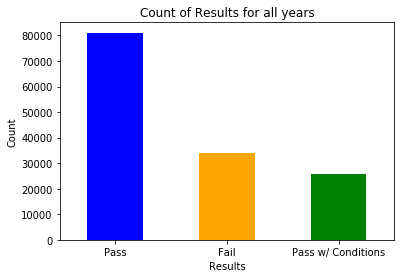

In [14]:
Result_Bar = Food_Inspection['Results'].value_counts().plot.bar(color=['blue', 'orange', 'green'],title = 'Count of Results for all years')
Result_Bar.set_xlabel("Results")
Result_Bar.set_ylabel("Count")
Result_Bar.tick_params(labelrotation=360)

From above plot we took x axis as Result and Y axis as the count of Result for Pass, Fail and Pass with conditions respectively. we can say for the plot that Results count for pass(including Pass w/ condition) are quite high when compared to Fail. only around 25000 of the facilitis failed and rest of them Passed.

Below is the Pie chart for results for all years

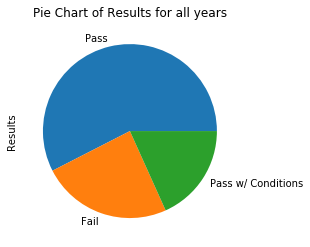

In [15]:
Result_Pie =Food_Inspection['Results'].value_counts().plot.pie(title = 'Pie Chart of Results for all years')

Form above pie chat we can say the Results for facilties are around 60% Passed and around 25% of them Failed and rest of it is Pass with condition.

---



We are given with different Facility types. so, for Facility type lets find which values are recorded more in number in below statement.

In [16]:
Food_Inspection['Facility_Type'].value_counts()

restaurant                         97087
grocery store                      17794
school                             10305
children's services facility        2230
bakery                              2136
daycare (2 - 6 years)               1844
daycare above and under 2 years     1776
long term care                      1126
catering                             785
daycare combo 1586                   527
liquor                               468
golden diner                         423
hospital                             359
mobile food preparer                 355
wholesale                            309
mobile food dispenser                279
tavern                               190
daycare (under 2 years)              169
special event                        116
gas station                          101
banquet hall                          84
shelter                               80
shared kitchen                        74
live poultry                          70
kiosk           

From above we can see that for Facility types number of records for 'Grocery store' is higher and next to it is 'Restaurant'.

For Facility type 'Restaurant' we can see Results in plot by getting a relation between Facility Type - 'Restaurant' with the results.
Below is the statement for countplot using seaborn.

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

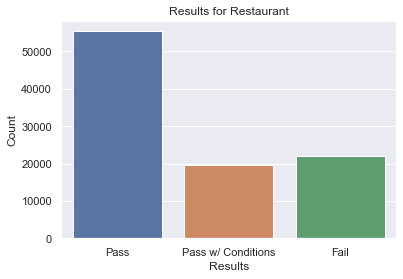

In [17]:
sns.set(style="darkgrid")
Result_Restaurant= sns.countplot(x="Results", data=Food_Inspection[Food_Inspection.Facility_Type =='restaurant'])
Result_Restaurant.set_title("Results for Restaurant")
Result_Restaurant.set_ylabel("Count")
plt.xticks(rotation=360)

From above countplot for 'Restaurant' the Results were 55+ thousands passed and only 22+ thousands failed in the Food inspection.

For the given Violations column we can see it contains Violationcode in first string place followed by discription. If we can just take the Code of the Violation column it would be helpful for us in Creating new column Violationcode to see if we can derive some analysis from it.

In [18]:
Food_Inspection['ViolationCode'] = Food_Inspection['Violations'].str[:2]
Food_Inspection['ViolationCode'] = Food_Inspection['ViolationCode'].str.replace(".","")
Food_Inspection.head()

Inspection_ID                 DBA_Name  License_#  Facility_Type  \
1        2312631  yates elementary school    25911.0         school   
2        2312624                  freshii  2690035.0     restaurant   
3        2312645  gorditas aguascalientes  2487821.0     restaurant   
4        2312639       panera bread #1004  1648670.0     restaurant   
5        2312621    lupita's supermercado  2690283.0  grocery store   

              Risk              Address      Zip Inspection_Date  \
1    Risk 1 (High)     1839 n richmond   60647.0       9/20/2019   
2    Risk 1 (High)  111 w jackson blvd   60604.0       9/20/2019   
3    Risk 1 (High)   5249 s kedzie ave   60632.0       9/20/2019   
4    Risk 1 (High)      525 s state st   60605.0       9/20/2019   
5  Risk 2 (Medium)   4301 s archer ave   60632.0       9/20/2019   

         Inspection_Type             Results  \
1  canvass re-inspection                Fail   
2  license re-inspection                Pass   
3                canvass  Pass w/ Conditions   
4  canvass re-inspection                Pass   
5                license                Fail   

                                          Violations   Latitude  Longitude  \
1  10. adequate handwashing sinks properly suppli...  41.915029 -87.700243   
2  55. physical facilities installed, maintained ...  41.878034 -87.631171   
3  23. proper date marking and disposition - comm...  41.797544 -87.703523   
4  51. plumbing installed; proper backflow device...  41.875179 -87.627474   
5  3. management, food employee and conditional e...  41.815301 -87.702042   

                                   Location ViolationCode  
1  (-87.70024324273244, 41.915028583238914)            10  
2   (-87.63117140697915, 41.87803442833617)            55  
3  (-87.70352333204033, 41.797543905371754)            23  
4   (-87.6274737894488, 41.875179056057796)            51  
5   (-87.70204160078063, 41.81530069366088)             3

Below lets check if violationcode are unique with funciton unique()

In [19]:
Food_Inspection.ViolationCode.unique()

array(['10', '55', '23', '51', '3', '1', '48', '33', '5', '38', '40',
       '21', '56', '36', '43', '53', '37', '47', '2', '25', '39', '59',
       '49', '58', '22', '41', '44', '60', '54', '57', '14', '8', '16',
       '50', '52', '9', '45', '6', '29', '15', '13', '28', '24', '35',
       '63', '4', '20', '11', '12', '19', '30', '18', '32', '34', '31',
       '7', '26', '42', '17', '27', '70'], dtype=object)

From above statements we can see that the Violationcode is unique code.

Using stemplot we can see for each Violationcode the number of inspections and which code is higher.
Below is the statement for Stemplot using matplotlib.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


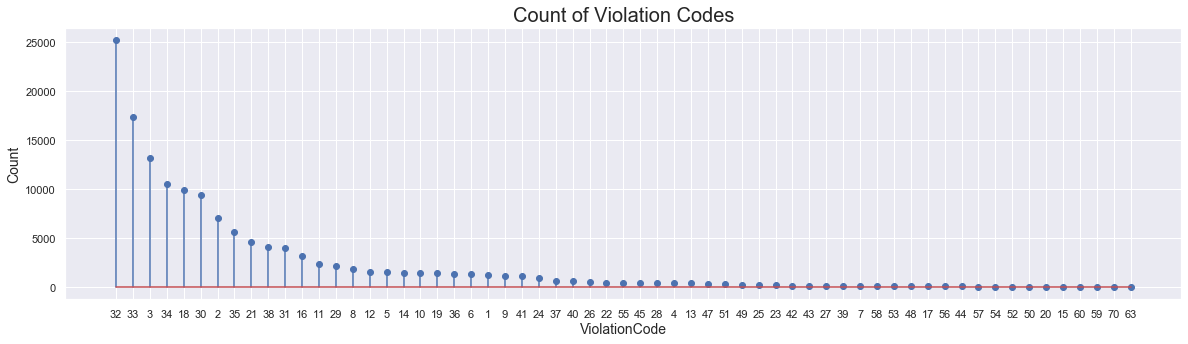

In [20]:
plt.figure(figsize=(20,5))
plt.stem(Food_Inspection.ViolationCode.value_counts().index,Food_Inspection.ViolationCode.value_counts(),bottom=-2)
plt.title("Count of Violation Codes",size=20)
plt.xlabel('ViolationCode',size=14)
plt.ylabel('Count',size=14)
plt.show()

In above stemplot We have violation codes on x axis and count of the violation code on Y axis.
From above plot we can say for volationcode 32 is registered more than 25 thousand times followed by 33,3 and so on.

The Inspection date is give in mm/dd/year format, to use the year in our analysis first we need to create a column name Year.
Below we are Using seaborn to plot a Histogram for number of inspections by year.

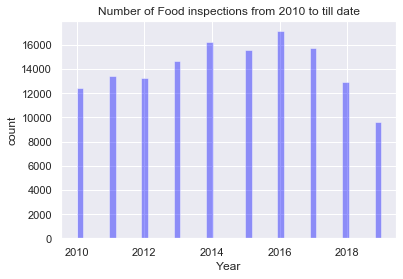

In [21]:
Food_Inspection['Year']=pd.DatetimeIndex(Food_Inspection['Inspection_Date']).year
pyear=sns.distplot(Food_Inspection["Year"],color='blue',kde=False)
pyear.set_title('Number of Food inspections from 2010 to till date')
pyear.set_ylabel('count')
plt.show()

in above histogram we can see that of all years in 2016 more inspections are done. 
we can see in above histogram we has spaces between the bars it is because the variables taken are discreate.

Using the longitude and latitude values we can draw a scatter plot for the column Risk.
Below is the statement for scatterplot using seaborn.

Text(0, 0.5, 'Latitude')

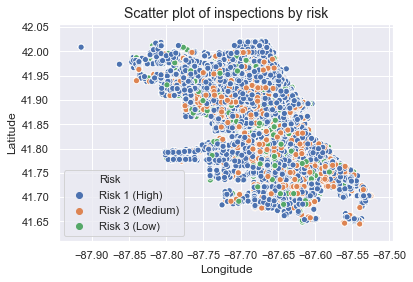

In [22]:
sns_scatterplot = sns.scatterplot(x='Longitude',y='Latitude',hue='Risk' ,data=Food_Inspection)
sns_scatterplot.set_title("Scatter plot of inspections by risk",size=14)
sns_scatterplot.set_xlabel('Longitude',size=12)
sns_scatterplot.set_ylabel('Latitude',size=12)

From above we can see 3 different Risks are showing in a scatterplot using blue for Risk1, orange for Risk2 and green for Risk3 using the longitude and latitude values. Also we can see blue dots are more which means there are more Risk1 factors in the data.

Below is the lmpot for facility type 'Restaurant' using longitude and latitude values we can see a plot where all the Restuarant can be seen.

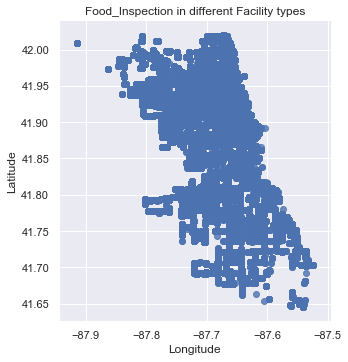

In [23]:
sns.lmplot(x='Longitude', y='Latitude', data=Food_Inspection[Food_Inspection['Facility_Type'] == 'restaurant'], fit_reg=False )   
plt.title("Food_Inspection in different Facility types")
plt.show()

From above lmplot we can see the locations of all the restaurants accordingly to there respective longitude and latitude values.

For Risk we have 3 values using bar plot we can see which risk is noted higher or lower in below plot.

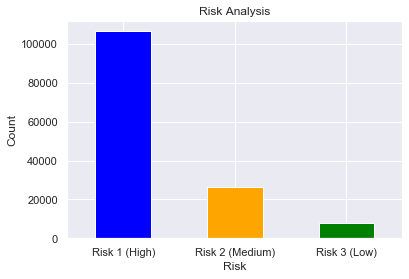

In [24]:
Risk_Bar = Food_Inspection['Risk'].value_counts().plot.bar(color=['blue', 'orange', 'green'],title = 'Risk Analysis')
Risk_Bar.set_xlabel("Risk")
Risk_Bar.set_ylabel("Count")
Risk_Bar.tick_params(labelrotation=360)

From above plot we can see that Risk 1 is noted higher and risk 3 is very low.

In below statement we create a subset for Risk -Risk1 and see the first few rows.

In [25]:
Food_Inspection_Risk1=Food_Inspection[Food_Inspection.Risk=='Risk 1 (High)']
Food_Inspection_Risk1.head()

Inspection_ID                                         DBA_Name  License_#  \
1        2312631                          yates elementary school    25911.0   
2        2312624                                          freshii  2690035.0   
3        2312645                          gorditas aguascalientes  2487821.0   
4        2312639                               panera bread #1004  1648670.0   
6        2312625  ladybug & friends daycare and preschool ip, llc  2522561.0   

                  Facility_Type           Risk                 Address  \
1                        school  Risk 1 (High)        1839 n richmond    
2                    restaurant  Risk 1 (High)     111 w jackson blvd    
3                    restaurant  Risk 1 (High)      5249 s kedzie ave    
4                    restaurant  Risk 1 (High)         525 s state st    
6  children's services facility  Risk 1 (High)  3620 w irving park rd    

       Zip Inspection_Date        Inspection_Type             Results  \
1  60647.0       9/20/2019  canvass re-inspection                Fail   
2  60604.0       9/20/2019  license re-inspection                Pass   
3  60632.0       9/20/2019                canvass  Pass w/ Conditions   
4  60605.0       9/20/2019  canvass re-inspection                Pass   
6  60618.0       9/20/2019                license                Pass   

                                          Violations   Latitude  Longitude  \
1  10. adequate handwashing sinks properly suppli...  41.915029 -87.700243   
2  55. physical facilities installed, maintained ...  41.878034 -87.631171   
3  23. proper date marking and disposition - comm...  41.797544 -87.703523   
4  51. plumbing installed; proper backflow device...  41.875179 -87.627474   
6  51. plumbing installed; proper backflow device...  41.953854 -87.718767   

                                   Location ViolationCode  Year  
1  (-87.70024324273244, 41.915028583238914)            10  2019  
2   (-87.63117140697915, 41.87803442833617)            55  2019  
3  (-87.70352333204033, 41.797543905371754)            23  2019  
4   (-87.6274737894488, 41.875179056057796)            51  2019  
6   (-87.71876668911054, 41.95385404889773)            51  2019

Using Folium map and plugins we can see the locations of all the Risk1 faciltiy types with respect to there Longitude, latitude values and DBA names.

In [26]:
Food_Inspection_Risk1_1000=Food_Inspection_Risk1[:1000]
Longitude=Food_Inspection_Risk1_1000.Longitude.mean()
Latitude=Food_Inspection_Risk1_1000.Latitude.mean()
FI_Risk1_Map=folium.Map([Latitude,Longitude],zoom_start=12)

FI_Risk1_Distribution_map=plugins.MarkerCluster().add_to(FI_Risk1_Map)
for Latitude,Longitude,label in zip(Food_Inspection_Risk1_1000.Latitude,Food_Inspection_Risk1_1000.Longitude,Food_Inspection_Risk1_1000['DBA_Name']):
    folium.Marker(location=[Latitude,Longitude],icon=None,popup=label).add_to(FI_Risk1_Distribution_map)
FI_Risk1_Map.add_child(FI_Risk1_Distribution_map)

FI_Risk1_Map

From above map we can see the locations for Risk1 facilites all around chicago. They are been marked and showed in green circles with the index number on it.

Conclusion:


More than half facilites pass Food inspecition test without any conditions (only ~20% fail).

Grocery stores and Restaurants facilties are more out of all the Facilities been Inspected.

Most Facilities have a 1st type of risk which is High.

Highest number of inspections are done in the year 2016.

More than 15000 facilities got Violation -'32. FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED' while inspection.

There is no relation between the Risk and Result.

More Inpections are registed for Facilities around downtown of chicago .